In [1]:
# The Reuters Dataset

from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

len(train_data)
len(test_data)
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [2]:
# The Reuters Dataset

word_index= reuters.get_word_index()
reverse_word_index= dict([(value, key) for(key, value) in word_index.items()])
decoded_newswire= " ".join([reverse_word_index.get(i-3, "?") for i in
    train_data[0]])

train_labels[10]

3

In [3]:
# Preparing The Data

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results= np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train= to_one_hot(train_labels)
y_test= to_one_hot(test_labels)

from tensorflow.keras.utils import to_categorical

y_train= to_categorical(train_labels)
y_test= to_categorical(test_labels)

In [4]:
# Building The Model

from tensorflow import keras
from tensorflow.keras import layers

model= keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [6]:
# Compiling The Model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
# Validating The Approach

x_val= x_train[:1000]
partial_x_train= x_train[1000:]
y_val= y_train[:1000]
partial_y_train= y_train[1000:]

In [8]:
# Training The Model

history= model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 2.3860 - accuracy: 0.5026 - val_loss: 1.3545 - val_accuracy: 0.6850
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 1.0464 - accuracy: 0.7775 - val_loss: 1.0107 - val_accuracy: 0.7880
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 0.6351 - accuracy: 0.8659 - val_loss: 0.8712 - val_accuracy: 0.8180
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 0.3943 - accuracy: 0.9171 - val_loss: 0.8740 - val_accuracy: 0.8210
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2802 - accuracy: 0.9372 - val_loss: 0.8587 - val_accuracy: 0.8240
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.2154 - accuracy: 0.9491 - val_loss: 0.9062 - val_accuracy: 0.8170
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.1888 - accuracy: 0.9504 - val_loss: 0.8871 - val_accuracy: 0.8160
Epoch 8/20
63/63 [==

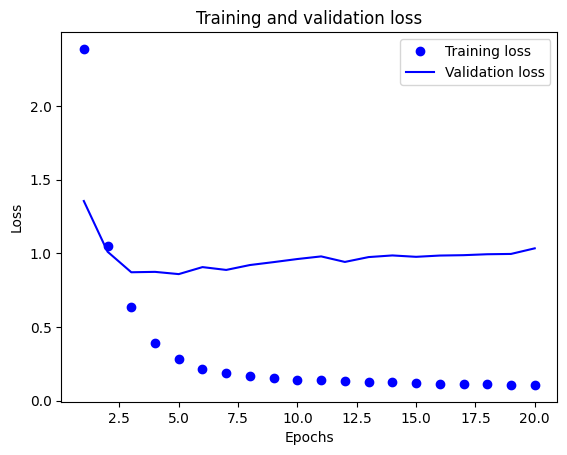

In [9]:
# Display Training and Validation Loss

import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

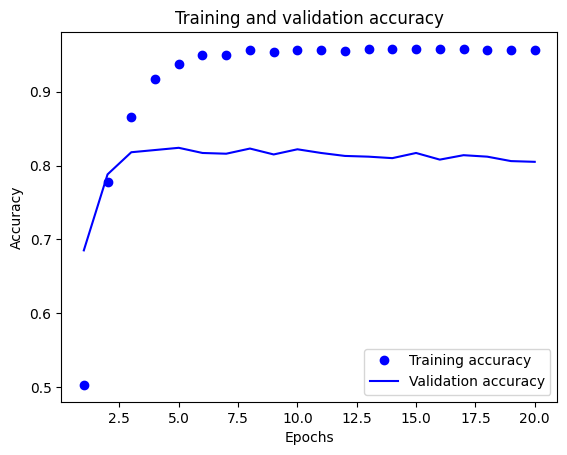

In [10]:
# Display Training and Validation Accuracy

plt.clf()
acc= history.history["accuracy"]
val_acc= history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
# Retraining a model from scratch

model= keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )
model.fit(x_train, y_train, epochs=10, batch_size=128 )
results= model.evaluate(x_test, y_test)

Epoch 1/10
71/71 [==============================] - 1s 3ms/step - loss: 2.0992 - accuracy: 0.5895
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 1.0095 - accuracy: 0.7759
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.6241 - accuracy: 0.8668
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.3991 - accuracy: 0.9162
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.2856 - accuracy: 0.9364
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.2268 - accuracy: 0.9450
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.1984 - accuracy: 0.9485
Epoch 8/10
71/71 [==============================] - 0s 3ms/step - loss: 0.1719 - accuracy: 0.9526
Epoch 9/10
71/71 [==============================] - 0s 3ms/step - loss: 0.1653 - accuracy: 0.9529
Epoch 10/10
71/71 [==============================] - 0s 2ms/step - loss: 1.0362 - accuracy: 0.8001


In [12]:
results

[1.0362131595611572, 0.8000890612602234]

In [15]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [16]:
print(f" The predicted label of first example: {np.argmax(predictions[0])}")

 The predicted label of first example: 3
